/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.9745762711864406

Classification Report:
              precision    recall  f1-score   support

         MAM       0.92      1.00      0.96        34
           N       1.00      0.95      0.98        44
         SAM       1.00      0.97      0.99        40

    accuracy                           0.97       118
   macro avg       0.97      0.98      0.97       118
weighted avg       0.98      0.97      0.97       118


Confusion Matrix:
[[34  0  0]
 [ 2 42  0]
 [ 1  0 39]]


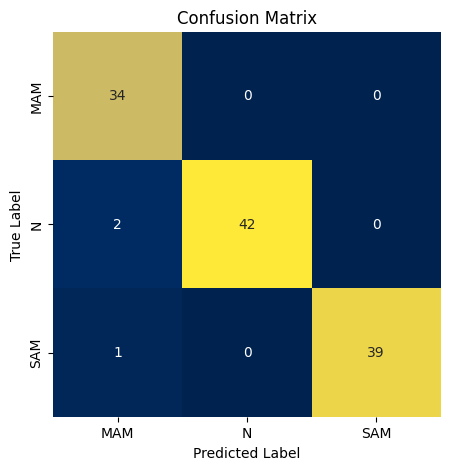

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Step 1: Clustering
df = pd.read_csv('DDATA250.csv')
X_clustering = df[['gender', 'age', 'height', 'weight']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_label'] = kmeans.fit_predict(X_clustering)

# Step 2: Classification
X_classification = pd.concat([X_clustering, pd.get_dummies(df['cluster_label'], prefix='cluster')], axis=1)
y = df['nutri_status']
le = LabelEncoder()
le.fit(y)
# Addressing Class Imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_classification, y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter Tuning for Gradient Boosting Classifier
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 5, 7]}
gb_classifier = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_gb_classifier = grid_search.best_estimator_

# Training the model
best_gb_classifier.fit(X_train_scaled, y_train)

# Predicting and evaluating
y_pred = best_gb_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
# Visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='cividis', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

We've switched to using a Gradient Boosting classifier and performed hyperparameter tuning using GridSearchCV to find the best parameters.
We've also applied feature scaling to the input data before training the model.
Run this code to see if these changes improve the accuracy of your model. You can further experiment with different hyperparameters, feature engineering techniques, or ensemble methods to potentially achieve higher accuracy.